# Random Imputation

It is the technique of filling missing value in the data by selecting random number from the given data. 

(Note: we didn't select random number outside the selective column)

This technique is not available in scikit learn. 

**Advantage**

Preserve the variance of the data.

**Disadvantage**

1. Memory heavy for deployment, as we need to store the original training set to extract values from and replace the NA in coming observation.

2. Well suited for linear models as it does not distort the distribution, regardless of the % of NA.

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [3]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.isnull().mean() * 100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [5]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [7]:
X_train

,Age,Fare
30,40.0,27.7208
10,4.0,16.7000
873,47.0,9.0000
182,9.0,31.3875
876,20.0,9.8458
...,...,...
534,30.0,8.6625
584,NaN,8.7125
493,71.0,49.5042
527,NaN,221.7792


In [9]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [10]:
X_test.tail()

,Age,Fare,Age_imputed
89,24.0,8.0500,24.0
80,22.0,9.0000,22.0
846,NaN,69.5500,NaN
870,26.0,7.8958,26.0
251,29.0,10.4625,29.0


In [14]:
X_train.sample(5)

,Age,Fare,Age_imputed
765,51.0,77.9583,51.0
230,35.0,83.4750,35.0
589,NaN,8.0500,NaN
603,44.0,8.0500,44.0
350,23.0,9.2250,23.0


In [15]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

In [16]:
X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values

array([30.  , 57.  , 45.  , 43.  ,  0.67, 20.  , 39.  , 23.  , 32.  ,
       11.  , 20.  , 27.  , 28.5 , 61.  , 54.  , 40.  , 17.  , 29.  ,
       52.  , 48.  , 26.  , 38.  , 36.  , 21.  , 31.  , 56.  , 22.  ,
       21.  , 35.  ,  6.  , 28.  , 30.  , 38.  , 45.  , 20.  , 28.  ,
       17.  ,  4.  , 21.  , 51.  ,  0.75, 60.  , 24.  , 30.  , 47.  ,
       34.  ,  9.  , 30.  , 27.  , 39.  , 54.  , 71.  , 56.  , 30.  ,
        2.  , 26.  , 32.  , 18.  , 46.  , 50.  , 54.  , 24.  , 20.  ,
       24.  , 34.  ,  2.  , 22.  , 27.  , 22.  , 44.  ,  4.  , 36.  ,
       14.  , 51.  , 28.  , 29.  , 36.  , 49.  , 27.  , 52.  , 30.  ,
       34.  , 30.  , 45.  , 52.  , 32.  , 11.  , 31.  , 36.  , 66.  ,
       45.  , 46.  , 22.  , 24.  , 64.  , 30.  , 18.  , 49.  , 22.  ,
       20.  , 14.  , 30.  ,  0.83, 29.  , 30.  , 33.  , 36.  , 40.  ,
       24.  , 18.  , 35.  , 32.  , 53.  , 30.  , 34.  , 24.  , 54.  ,
       43.  , 20.  , 21.  , 40.  , 36.  , 17.  , 42.  , 14.  , 45.  ,
       28.  , 36.  ,

In [17]:
X_train['Age'].isnull().sum()

np.int64(148)

In [18]:
X_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,32.0
493,71.0,49.5042,71.0
527,NaN,221.7792,38.0


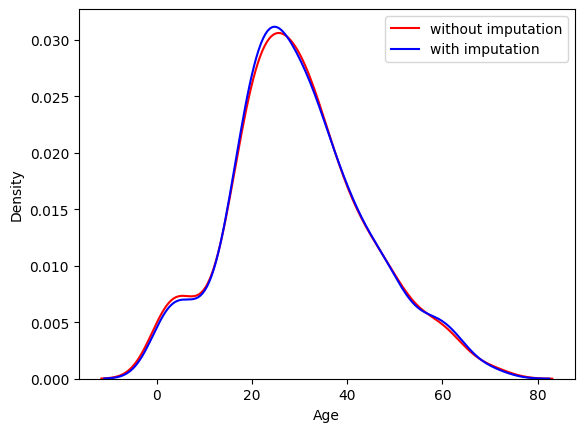

In [21]:
sns.kdeplot(X_train['Age'], color='red', label = 'without imputation')
sns.kdeplot(X_train['Age_imputed'], color='blue', label = 'with imputation')
plt.legend()
plt.show()

In [22]:
print('Original variable variance: ', X_train['Age'].var())
print('Variance after random imputation: ', X_train['Age_imputed'].var())

Original variable variance:  204.34951339046142
Variance after random imputation:  201.94037522855135


In [23]:
X_train[['Fare', 'Age', 'Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,57.689745
Age,71.512440,204.349513,204.349513
Age_imputed,57.689745,204.349513,201.940375


<Axes: >

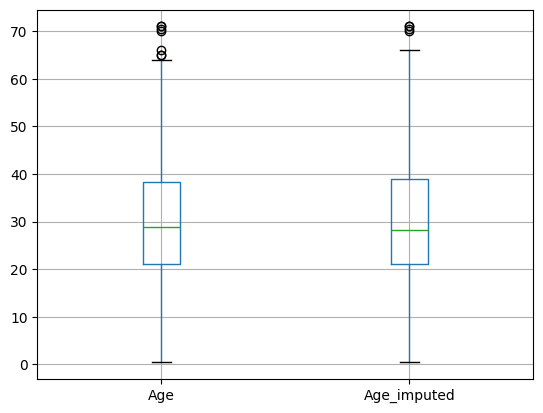

In [24]:
X_train[['Age', 'Age_imputed']].boxplot()

In [ ]:
sampled_value = X_train['Age'].dropna().sample(1, random_state=int(observation['Fare']))

In [25]:
data = pd.read_csv('house-train.csv',usecols=['GarageQual','FireplaceQu', 'SalePrice'])

In [26]:
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [27]:
data.isnull().mean() * 100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [28]:
X = data
y = data['SalePrice']

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [30]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [31]:
X_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
386,NaN,NaN,81000,NaN,NaN
688,Gd,TA,392000,TA,Gd
480,Gd,TA,326000,TA,Gd
215,Fa,TA,134450,TA,Fa
673,TA,TA,257500,TA,TA


In [32]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22336\856878696.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22336\856878696.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22336\856878696.py:4: SettingWithCopyWarning: 
A

In [33]:
temp = pd.concat(
        [
            X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
            X_train['GarageQual_imputed'].value_counts() / len(X_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

In [34]:
temp

,original,imputed
TA,0.951043,0.950342
Fa,0.037171,0.038527
Gd,0.009973,0.009418
Po,0.000907,0.000856
Ex,0.000907,0.000856


In [36]:
temp = pd.concat(
        [
            X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
            X_train['FireplaceQu_imputed'].value_counts() / len(df)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

temp

,original,imputed
Gd,0.494272,0.647587
TA,0.412439,0.539843
Fa,0.040917,0.052750
Po,0.027823,0.037037
Ex,0.024550,0.033670


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22336\1827688635.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22336\1827688635.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed297445

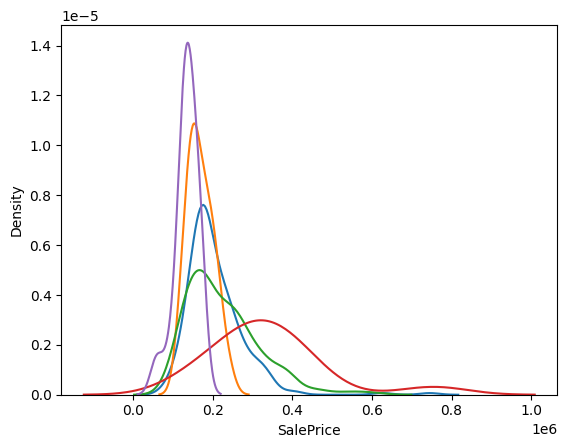

In [37]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22336\722808554.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22336\722808554.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed

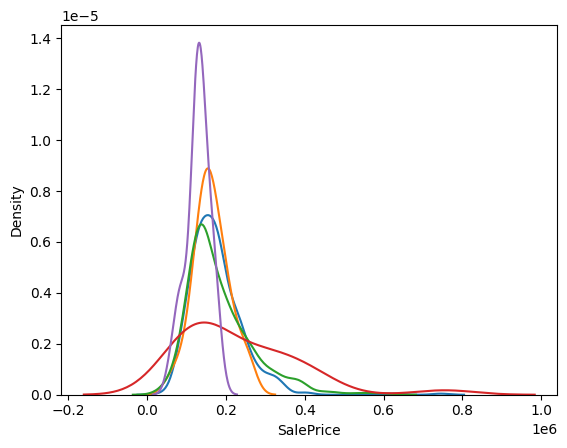

In [38]:
for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
plt.show()